## The global warming issue and Narratives around it<br>
### Part 5: Doing further analysis on a selected model for insight inferences, ***the real deal !***

In this notebook, I set the stage for perfomring my modeling

Importing the require libraries:

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import eli5

import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion


from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, FunctionTransformer


from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report


from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from nltk.corpus import stopwords

import pickle

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


## Part 4.1: Importing the saved dataframe

In [2]:
df_reddit = pickle.load(open('../datasets/df_reddit_for_model.pkl', 'rb'))


list_stop_words = ["dec", "global", "http", "www", "com", "conspiraci", "warm", "climat", "remov", "theori", "theactualshadow", "co"]



def remove_stops(item):

    stops = list_stop_words
    words = [w for w in item.split() if w not in stops]#stops
    
    words = " ".join(list(words)) # Adding space
    
    return words

df_reddit['text_merged'] = df_reddit['text_merged'].apply(remove_stops)











df_reddit.head()

,author,created_utc,id,num_comments,over_18,post_hint,score,subreddit_subscribers,text_merged,subreddit,text_char_count,text_word_count,sentiment_score,date,target
0,Kafka15,1593554514,hixbtf,2,0,image,1,6157.0,cum,GlobalWarming,3,1,0.0000,2020-06-30 22:01:54,1
1,karan_negiiiii,1593497051,hihj6s,0,0,Empty,1,6156.0,chang india,GlobalWarming,18,3,0.0000,2020-06-30 06:04:11,1
2,Hildavardr,1593479932,hidb5h,0,0,Empty,1,6154.0,respons big compani,GlobalWarming,37,6,0.2263,2020-06-30 01:18:52,1
3,pEppapiGistfuhrer,1593455137,hi5h41,1,0,image,1,6152.0,ayi let stop,GlobalWarming,24,5,-0.0772,2020-06-29 18:25:37,1
4,BrexitBlaze,1593455005,hi5feq,2,0,link,2,6152.0,uk minist send mix messag commit say fund mana...,GlobalWarming,66,13,0.2960,2020-06-29 18:23:25,1


## Bootstrapped the under-represented class to balance the classes:

In [3]:
n_bts_sample = df_reddit[(df_reddit["subreddit"]=="GlobalWarming")].shape[0] - df_reddit[(df_reddit["subreddit"]=="ConspiracyTheory")].shape[0]

df_btsp = df_reddit[(df_reddit["subreddit"]=="ConspiracyTheory")].sample(n = n_bts_sample, replace=True, random_state=42)

df_reddit_btsp = pd.concat([df_reddit, df_btsp])

df_reddit_btsp.reset_index(drop=True, inplace=True)

## Part 4.2- **Logistic Regression**, only on vectorized text (using CountVectorizer)

In [4]:
X = df_reddit_btsp['text_merged']
y = df_reddit_btsp['target']

In [5]:
X.shape

(7868,)

### Defining variables

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify=y,
                                                    random_state = 42)

Checking for stratified target variables:

In [7]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

In [8]:
y_train.value_counts(normalize=True)

1    0.500085
0    0.499915
Name: target, dtype: float64

In [9]:
y_test.value_counts(normalize=True)

0    0.500254
1    0.499746
Name: target, dtype: float64

## Baseline accuracy:

In [10]:
y_test.value_counts(normalize=True)

0    0.500254
1    0.499746
Name: target, dtype: float64

Hence, 50%, this is the worst we are allowed to do!

### Vectorizing text data and looking into it:

In [11]:
#Adding a stop word list which I derived from an initial plot:



vectorizer = CountVectorizer(analyzer = "word",
                             #ngram_range=(1,2),
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = list_stop_words,
                             max_features = 3000) 


X_train_features = vectorizer.fit_transform(X_train)

pickle.dump(vectorizer, open('../datasets/vectorizer.pkl', 'wb'))

X_test_features = vectorizer.transform(X_test)

In [12]:
X_train_features_df = pd.DataFrame(X_train_features.toarray(),
                          columns=vectorizer.get_feature_names())
X_train_features_df.head(2)

,abandon,abduct,abducte,abil,abl,absolut,absorb,abus,ac,accept,...,youtu,youtub,yqwynca,zag,zealand,zero,zeu,zig,zombi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in X_train_features_df.columns:
    # save sum of each column in dictionary
    top_words[i] =  X_train_features_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
most_freq

,0,1
0,world,1117
1,like,953
2,peopl,891
3,chang,888
4,would,804
...,...,...
2995,withdraw,8
2996,worthi,8
2997,yqwynca,8
2998,zag,8


---

# Word-use-aggression (WUA) feature:
Write the formulae in the markdown later if useful feature:
WUA = ⎇|w_i - w_top_words|

In [14]:
cvec = CountVectorizer(stop_words=list_stop_words, min_df=4, max_df=1.0)
term_mat = cvec.fit_transform(df_reddit['text_merged'])
len(cvec.get_feature_names())

term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

term_df.insert(0, 'targets', df_reddit["target"])
term_df.head(2)

,targets,ab,abandon,abil,abl,absolut,absorb,absorpt,abstract,absurd,...,york,yorker,young,younger,youth,youtu,youtub,zealand,zero,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#term_df.groupby('targets').mean().T.sort_values(0, ascending=False).head(20)

In [16]:
top_words_ct = list(term_df.groupby('targets').
     mean().T.sort_values(0, ascending=False).head(100).index)

top_words_ch = list(term_df.groupby('targets').
     mean().T.sort_values(1, ascending=False).head(100).index)

top_words_overlap = [word for word in top_words_ch if word in top_words_ct]



pickle.dump(top_words_overlap, open('../datasets/top_words_overlap.pkl', 'wb'))

In [17]:
top_words_overlap[:5]

['year', 'earth', 'world', 'would', 'peopl']

In [18]:
def get_uwa(item):

    words = [w for w in item.split()]
    #print(words)
    
    index_list = []
    
    for i in range(len(words)):
        
        if (words[i] in list(top_words)):
            index_list.append(i)
    
    dist = 0
    
    dist = np.sum(np.array(index_list[1:]) - np.array(index_list[0:-1]))
    
    return dist

In [19]:
df_reddit['wua'] = df_reddit['text_merged'].apply(get_uwa)


In [20]:
df_reddit.head()

,author,created_utc,id,num_comments,over_18,post_hint,score,subreddit_subscribers,text_merged,subreddit,text_char_count,text_word_count,sentiment_score,date,target,wua
0,Kafka15,1593554514,hixbtf,2,0,image,1,6157.0,cum,GlobalWarming,3,1,0.0000,2020-06-30 22:01:54,1,0.0
1,karan_negiiiii,1593497051,hihj6s,0,0,Empty,1,6156.0,chang india,GlobalWarming,18,3,0.0000,2020-06-30 06:04:11,1,1.0
2,Hildavardr,1593479932,hidb5h,0,0,Empty,1,6154.0,respons big compani,GlobalWarming,37,6,0.2263,2020-06-30 01:18:52,1,2.0
3,pEppapiGistfuhrer,1593455137,hi5h41,1,0,image,1,6152.0,ayi let stop,GlobalWarming,24,5,-0.0772,2020-06-29 18:25:37,1,1.0
4,BrexitBlaze,1593455005,hi5feq,2,0,link,2,6152.0,uk minist send mix messag commit say fund mana...,GlobalWarming,66,13,0.2960,2020-06-29 18:23:25,1,8.0


---

### Now, instantiating the logistic regression model and fitting:

In [21]:
#Instantiating the model:
lr = LogisticRegression(solver='newton-cg')

In [22]:
lr.fit(X_train_features, y_train);

pickle.dump(lr, open('../datasets/lr.pkl', 'wb'))



In [23]:
lr.score(X_train_features, y_train)

0.9774614472123369

In [24]:
lr.score(X_test_features, y_test)



0.9323843416370107

Accuracy on test is not too good, need more work, overfit!

Creating a dataframe to look at the coefficient of the basae model:

In [25]:
df_coeffs = pd.DataFrame()
df_coef= pd.DataFrame(lr.coef_).T
df_feat = pd.DataFrame(vectorizer.get_feature_names())

df_lr_coefs=pd.concat([df_feat, df_coef], axis=1)
df_lr_coefs.columns = ["feature_names", "LR_coefficients"]
df_lr_coefs_sorted = df_lr_coefs.sort_values(by =["LR_coefficients"], ascending=False, ignore_index=True)
df_lr_coefs_sorted.tail(20)

,feature_names,LR_coefficients
2980,devic,-1.601822
2981,king,-1.637642
2982,cia,-1.638617
2983,conflict,-1.641999
2984,mark,-1.694568
2985,capitalist,-1.718462
2986,oct,-1.725363
2987,mirror,-1.762918
2988,club,-1.782644
2989,april,-1.794237


In [26]:
df_lr_coefs_sorted.head(20)

,feature_names,LR_coefficients
0,chang,2.701103
1,carbon,2.277294
2,scientist,2.004883
3,emiss,1.964167
4,environment,1.907267
5,temperatur,1.851639
6,futur,1.590890
7,ice,1.564098
8,hottest,1.491541
9,environ,1.482627


## Part 4.3- **Logistic Regression** <br><br>(only on vectorized text, vectorized by TF-IDF vectorizer)

In [27]:
# Instantiate the transformer.
tvec = TfidfVectorizer()

In [28]:
df = pd.DataFrame(tvec.fit_transform(X_train).toarray(),
                  columns=tvec.get_feature_names())
df.head()

,aa,aacgtmjui,aaliyah,aaron,aass,ab,aback,abandon,abbott,abbrevi,...,zoo,zoom,zorgt,zq,zr,ztiu,zuck,zuckerberg,zvhm,zwhvc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Designing a pipeline for TF-IDF analysis

In [29]:
# Set up a pipeline with tf-idf vectorizer and multinomial naive bayes

pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [30]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# No stop words and english stop words
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [list_stop_words, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [31]:
# Instantiate GridSearchCV.

gs_tvec = GridSearchCV(pipe_tvec, # what object are we optimizing?
                        param_grid = pipe_tvec_params, # what parameters values are we searching?
                        cv=5) # 5-fold cross-validation.

In [32]:
# Fit GridSearch to training data.
gs_tvec.fit(X_train, y_train);

In [33]:
# Score model on training set.
gs_tvec.score(X_train, y_train)

0.95051686154889

In [34]:
# Score model on testing set.
gs_tvec.score(X_test, y_test)

0.9166243009659379

In [35]:
# Get predictions
preds_tvec = gs_tvec.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

# Calculate the specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.9339430894308943


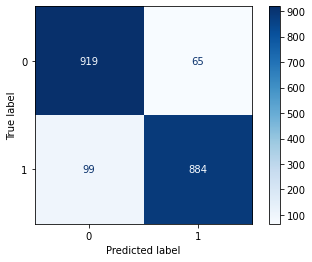

In [36]:
# visualize this

plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

## Part 4.4- **Logistic Regression** <br><br> (on numeric and text data)

DEsigning the pipeline:

In [37]:
df_reddit

,author,created_utc,id,num_comments,over_18,post_hint,score,subreddit_subscribers,text_merged,subreddit,text_char_count,text_word_count,sentiment_score,date,target,wua
0,Kafka15,1593554514,hixbtf,2,0,image,1,6157.0,cum,GlobalWarming,3,1,0.0000,2020-06-30 22:01:54,1,0.0
1,karan_negiiiii,1593497051,hihj6s,0,0,Empty,1,6156.0,chang india,GlobalWarming,18,3,0.0000,2020-06-30 06:04:11,1,1.0
2,Hildavardr,1593479932,hidb5h,0,0,Empty,1,6154.0,respons big compani,GlobalWarming,37,6,0.2263,2020-06-30 01:18:52,1,2.0
3,pEppapiGistfuhrer,1593455137,hi5h41,1,0,image,1,6152.0,ayi let stop,GlobalWarming,24,5,-0.0772,2020-06-29 18:25:37,1,1.0
4,BrexitBlaze,1593455005,hi5feq,2,0,link,2,6152.0,uk minist send mix messag commit say fund mana...,GlobalWarming,66,13,0.2960,2020-06-29 18:23:25,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,[deleted],1349719843,115d9u,0,0,Empty,0,2610.5,us air forc superson fli saucer declassifi,ConspiracyTheory,42,7,0.0000,2012-10-08 18:10:43,0,4.0
4824,[deleted],1348231298,108ubr,0,0,Empty,1,2610.5,dae think sin ruin r fascist totalitarian pers...,ConspiracyTheory,500,81,-0.9857,2012-09-21 12:41:38,0,79.0
4825,[deleted],1347716678,zxb87,1,0,Empty,9,2610.5,subreddit empti,ConspiracyTheory,26,3,0.0000,2012-09-15 13:44:38,0,1.0
4826,aayawa,1344626686,y0fkg,3,0,Empty,0,2610.5,one world govern possibl stabl,ConspiracyTheory,30,5,0.0000,2012-08-10 19:24:46,0,3.0


Step 1: defining transfomrers:

In [38]:
# create functions to return just the columns that you care about
get_text_data= FunctionTransformer(lambda x: x['text_merged'], validate = False)
get_numeric_data = FunctionTransformer(lambda x: x[['text_char_count', 'text_word_count', "sentiment_score", "score", "over_18", "wua"]], validate = False)

In [39]:
X = df_reddit[["text_merged",'text_char_count', 'text_word_count', "sentiment_score", "score", "over_18", "wua"]]
y = df_reddit['target']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y)

Pipe 3: Scale the numeric

In [40]:
pipe_v3 = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('cvec', CountVectorizer())
            ]))
    ])),
    ('logreg', LogisticRegression())
])

params = {
            #'cvec__stop_words' : [list_stop_words, 'english'],
           'logreg__penalty' : ['l1', 'l2']
}

gs = GridSearchCV(pipe_v3, params, cv=5)

gs.fit(X_train, y_train)
gs.score(X_train, y_train)



0.9781828224247445

In [41]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9781828224247445
0.9063794531897266


In [42]:
def nice_conmat(y_test, preds, classes):

    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])

In [43]:
# build a function to print out a nice confusion matrix
preds = gs.best_estimator_.predict(X_test)

nice_conmat(y_test, preds, ['consp', 'globalwarming'])

Accuracy Score: 0.9063794531897266


,Predicted consp,Predicted globalwarming
Actual consp,126,104
Actual globalwarming,9,968


In [44]:
#coefficients
coefficients = gs.best_estimator_.named_steps['logreg'].coef_[0]

In [45]:
# Best model in gridsearchCV
# Object is a Pipeline
gs.best_estimator_

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f808d82bb00>)),
                                                                 ('ss',
                                                                  StandardScaler())])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f808d82b9e0>)),
                                                                 ('cvec',
                                                                  CountVectorizer())]))])),
                ('logreg', LogisticRegression())])

In [46]:
features = gs.best_estimator_.named_steps['features'].transformer_list[1][1].named_steps['cvec'].get_feature_names()

In [47]:
features = ['text_char_count', 'text_word_count', "sentiment_score", "score", "over_18", "wua"] +\
gs.best_estimator_.named_steps['features'].transformer_list[1][1].named_steps['cvec'].get_feature_names()

# no changes to our coefficient variable:
# I'm just bringing it down here
coefficients = gs.best_estimator_.named_steps['logreg'].coef_[0]

In [48]:
coef_df = pd.DataFrame({'features': features, 
              'coef' : coefficients,
              'exp_coef': [np.exp(coef) for coef in coefficients] #exponentiated coefficients
             })

coef_df.head(10)

,features,coef,exp_coef
0,text_char_count,-1.005011,0.366041
1,text_word_count,-0.451835,0.636459
2,sentiment_score,0.604709,1.830720
3,score,0.812410,2.253331
4,over_18,-0.094325,0.909987
5,wua,-1.583840,0.205186
6,aa,0.000103,1.000103
7,aaaaaaacixu,0.000004,1.000004
8,aacgtmjui,-0.000159,0.999841
9,aaliyah,-0.000159,0.999841


# Interpretation: The numerical table do not seem to make much much imporvement on the score.

Fancy Schmancy Graphs maybe

In [49]:
coef_df = coef_df.set_index('features')
coef_df = coef_df.sort_values('exp_coef', ascending = False)
coef_df.head(10)

,coef,exp_coef
features,,
chang,2.530258,12.556739
carbon,1.615289,5.029340
scientist,1.521986,4.581313
ice,1.365560,3.917917
temperatur,1.331630,3.787210
stop,1.322673,3.753440
environment,1.267045,3.550347
environ,1.215856,3.373179
emiss,1.116443,3.053972


In [50]:
coef_df['exp_coef'].head(10).sort_values()

features
warn            2.960417
emiss           3.053972
environ         3.373179
environment     3.550347
stop            3.753440
temperatur      3.787210
ice             3.917917
scientist       4.581313
carbon          5.029340
chang          12.556739
Name: exp_coef, dtype: float64

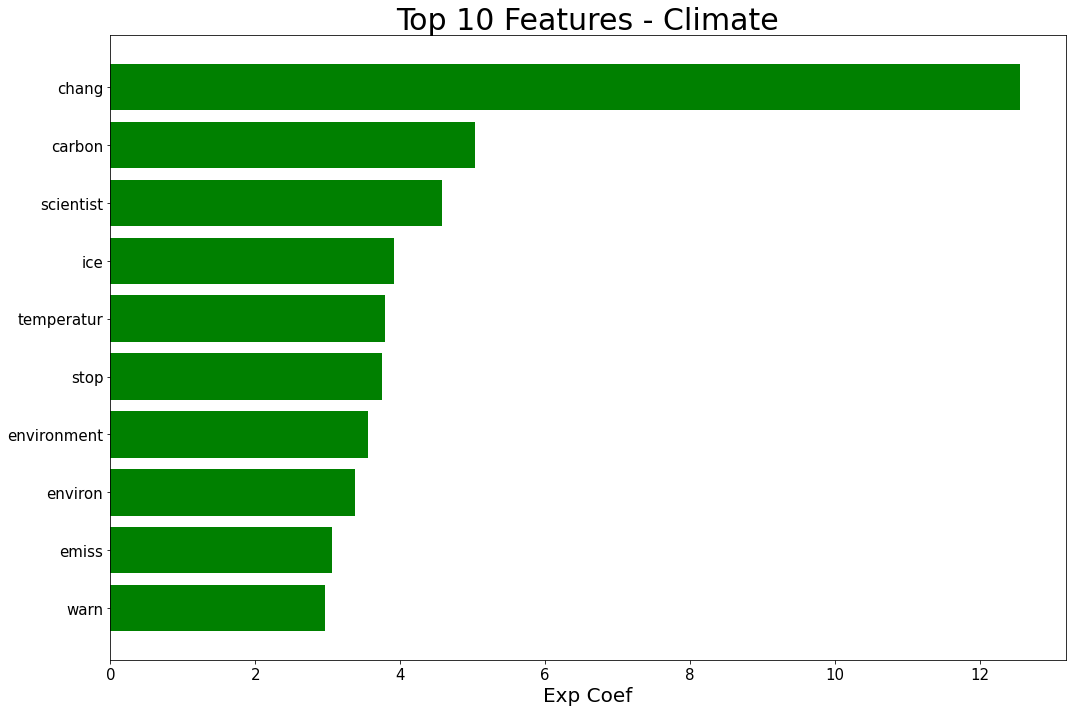

In [67]:
weights = coef_df['exp_coef'].head(10).sort_values()
labels = weights.index

plt.figure(figsize=(15,10))
plt.barh(labels, weights, color = 'green')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Exp Coef', fontsize=20)
plt.title(f'Top 10 Features - Climate', fontsize=30)
plt.tight_layout()

plt.savefig("../plots/Ranking_top.png")

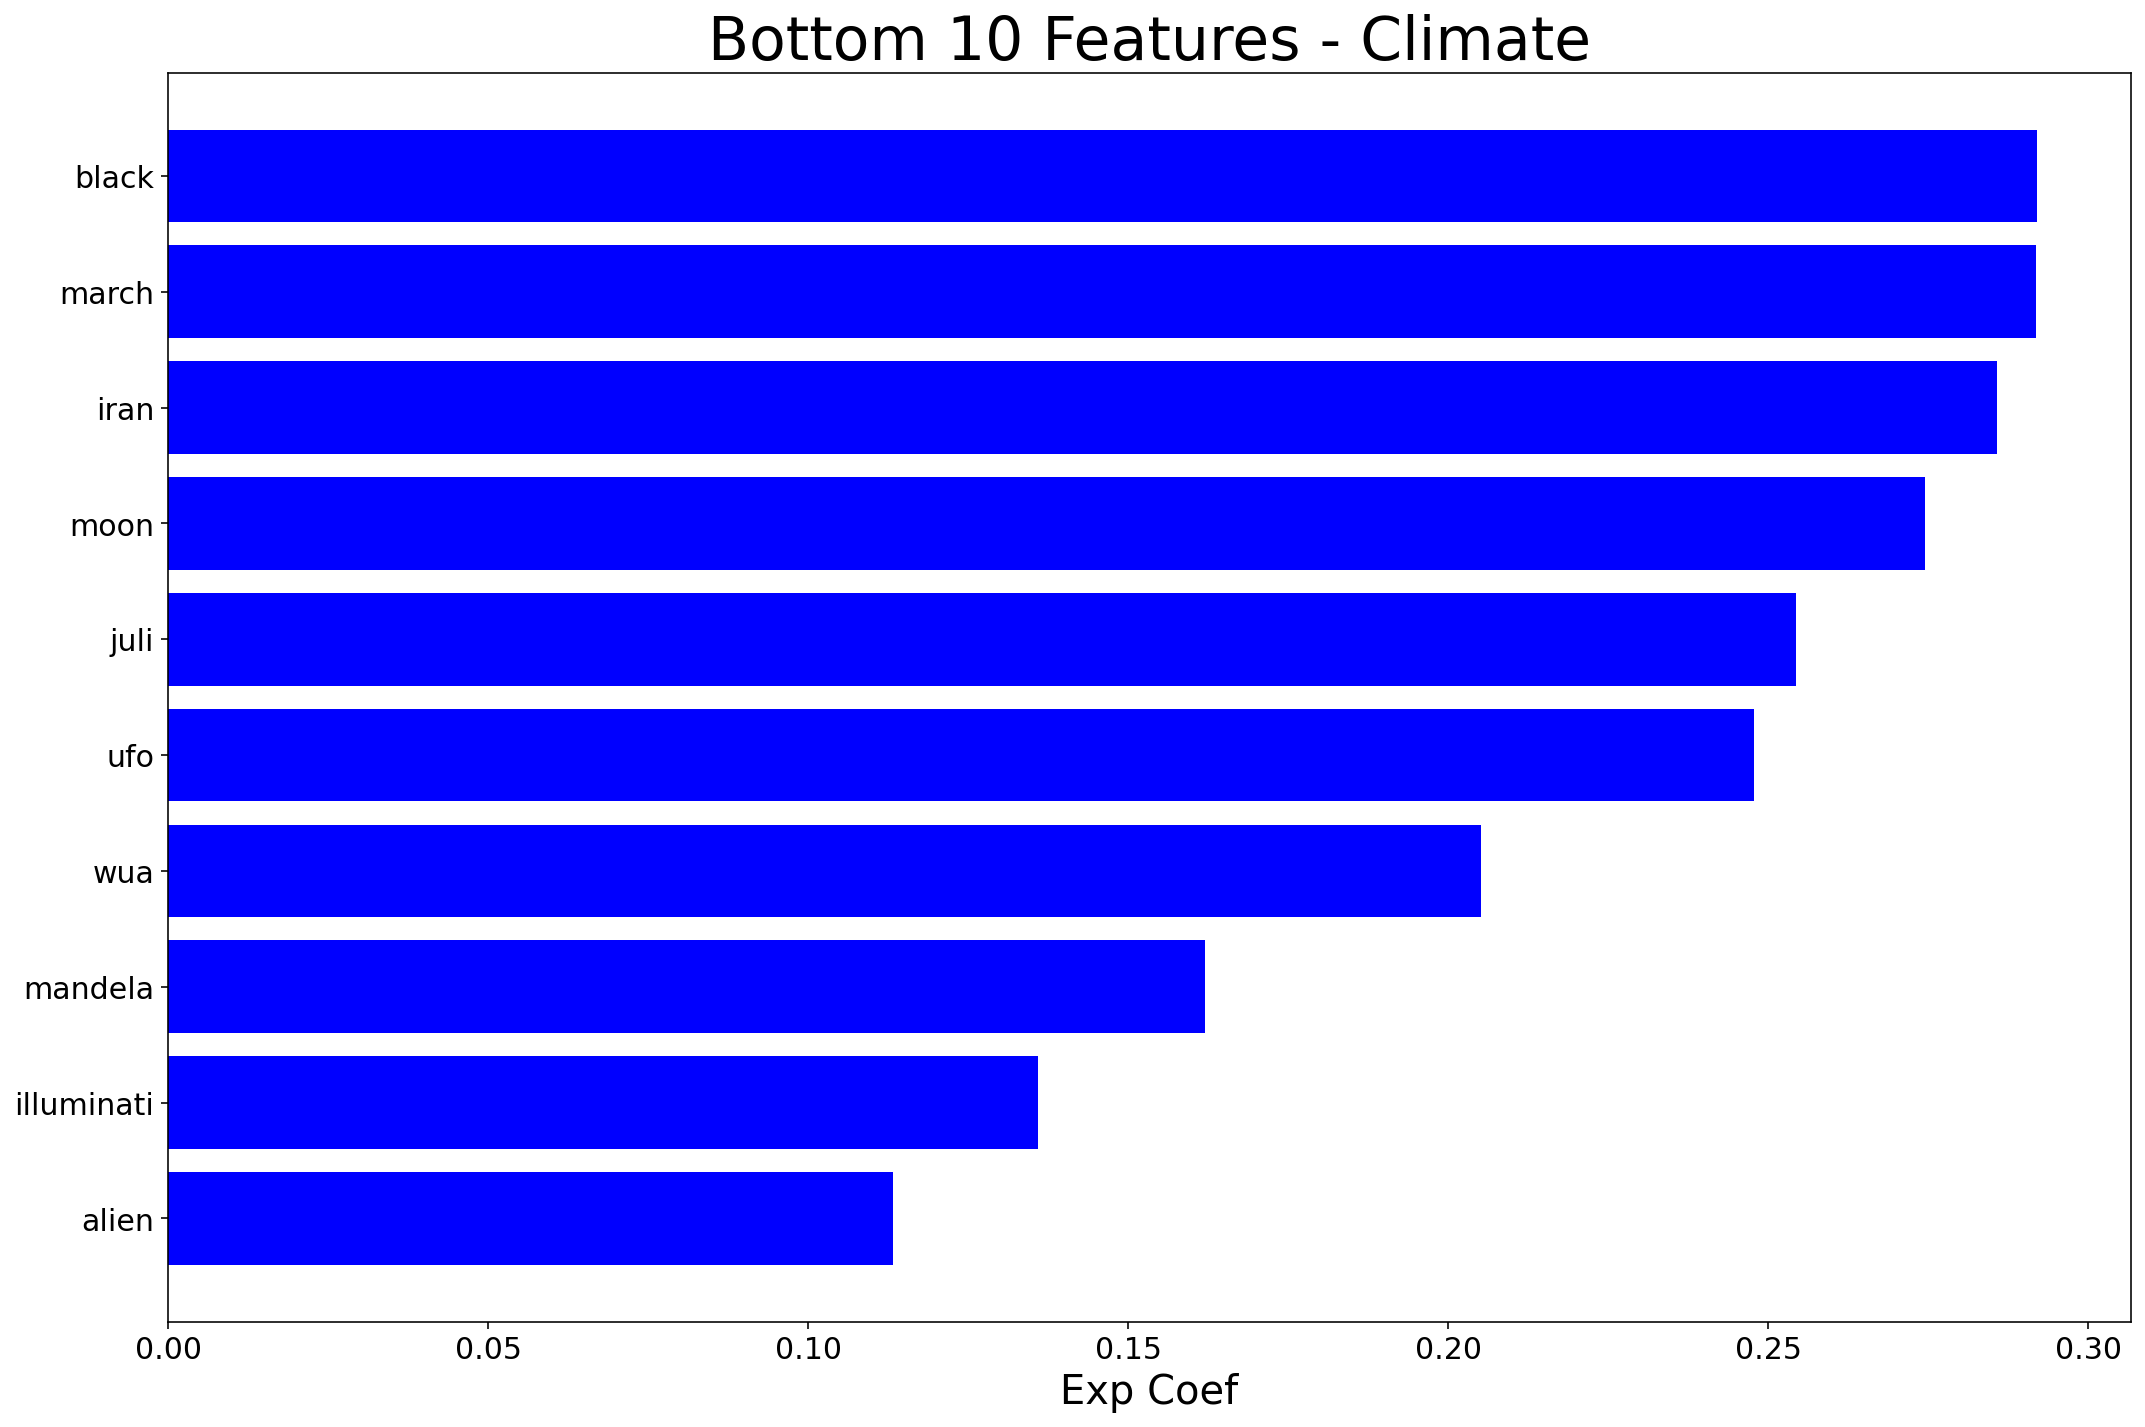

In [103]:
weights = coef_df['exp_coef'].tail(10).sort_values()
labels = weights.index

plt.figure(figsize=(15,10))
plt.barh(labels, weights, color = 'blue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Exp Coef', fontsize=20)
plt.title(f'Bottom 10 Features - Climate', fontsize=30)
plt.tight_layout()

plt.savefig("../plots/Ranking_bottom.png")

In [52]:
def token_time_series(item):

    words = [w for w in item.split()]
    #print(words)
    
    token_count = 0
    
    for word in words:
        
        if (word == key_word):
            token_count += 1
    
    return token_count

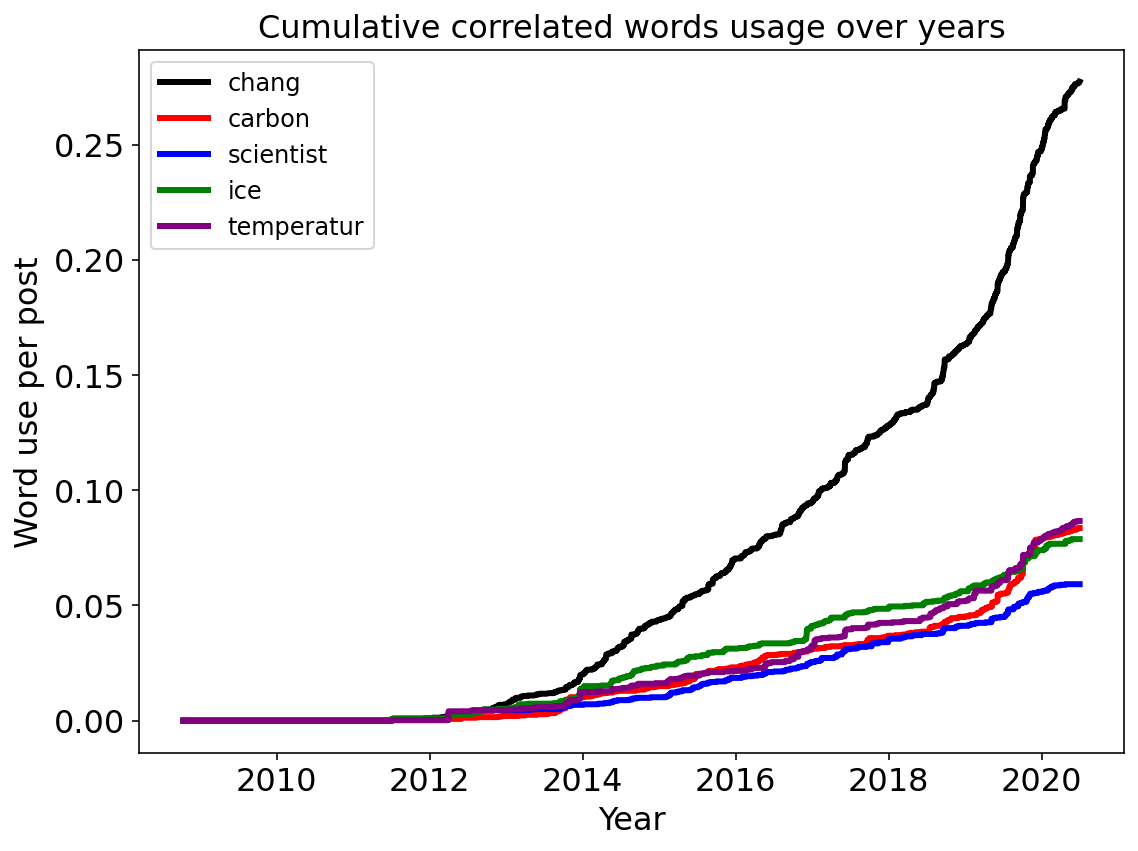

In [118]:
%config InlineBackend.figure_format = 'retina'


gw_post_num = 3934


plt.figure(figsize=(8,6))


weights = coef_df['exp_coef'].head(10).sort_values()
labels = weights.index

color = ["black", "red", "blue", "green", "purple"]

for i, label in enumerate(["chang", "carbon", "scientist", "ice", "temperatur"]):
    key_word = label
    df_reddit_test = df_reddit.copy()
        
    df_reddit_test.sort_values("date", axis = 0, ascending = False, 
                 inplace = True) 
    
    
    df_reddit_test['token_count'] = df_reddit_test['text_merged'].map(token_time_series)

    df_reddit_test['token_count_cum'] = df_reddit_test["token_count"].cumsum()
    df_reddit_test['token_count_cum'] = np.max(df_reddit_test['token_count_cum']) - df_reddit_test['token_count_cum']

    df_reddit_test = df_reddit_test.set_index('date')
    plt.plot(df_reddit_test['token_count_cum'] / gw_post_num, color = color[i], linewidth = 3)
    
#plt.xlim(2010, 2021)    
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Word use per post', fontsize=16)

plt.title('Cumulative correlated words usage over years', fontsize=16)

plt.legend(["chang", "carbon", "scientist", "ice", "temperatur"], fontsize = 12)
plt.tight_layout()

#Gtreta thungberg 21/09/2019

#plt.vlines(x = np.mean(dataframe[column]), ymin = 0, ymax = np.max((np.histogram(dataframe[column]))[0]), color = 'green', linewidth = 5, alpha = 0.6)
#ax[i].text(np.mean(dataframe[column]), np.max((np.histogram(dataframe[column]))[0]), f'mean={round(np.mean(dataframe[column]), 1)}', color = 'green')
        
plt.savefig("../plots/Word_use_top.png")


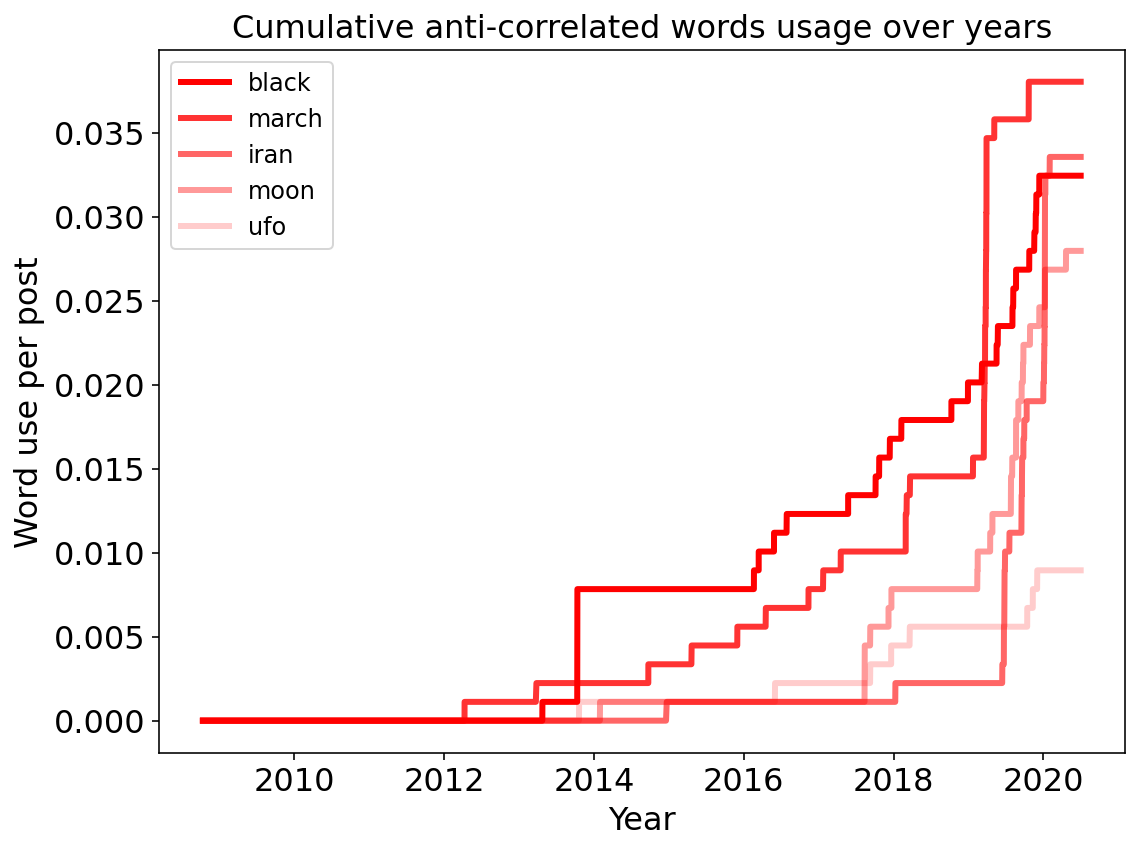

In [116]:
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize=(8,6))

ct_post_num = 894

weights = coef_df['exp_coef'].head(10).sort_values()
labels = weights.index

#color = ["black", "red", "blue", "green", "purple"]
alpha_ = [1, 0.8, 0.6, 0.4, 0.2]

for i, label in enumerate(["black", "march", "iran", "moon", "ufo"]):
    key_word = label
    df_reddit_test = df_reddit.copy()
        
    df_reddit_test.sort_values("date", axis = 0, ascending = False, 
                 inplace = True) 
    
    
    df_reddit_test['token_count'] = df_reddit_test['text_merged'].map(token_time_series)

    df_reddit_test['token_count_cum'] = df_reddit_test["token_count"].cumsum()
    df_reddit_test['token_count_cum'] = np.max(df_reddit_test['token_count_cum']) - df_reddit_test['token_count_cum']

    df_reddit_test = df_reddit_test.set_index('date')
    plt.plot(df_reddit_test['token_count_cum'] / ct_post_num, color = 'red', alpha = alpha_[i], linewidth = 3)
    
#plt.xlim(2010, 2021)    
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Word use per post', fontsize=16)


plt.title('Cumulative anti-correlated words usage over years', fontsize=16)

plt.legend(["black", "march", "iran", "moon", "ufo"], fontsize = 12)
plt.tight_layout()

#Gtreta thungberg 21/09/2019

#plt.vlines(x = np.mean(dataframe[column]), ymin = 0, ymax = np.max((np.histogram(dataframe[column]))[0]), color = 'green', linewidth = 5, alpha = 0.6)
#ax[i].text(np.mean(dataframe[column]), np.max((np.histogram(dataframe[column]))[0]), f'mean={round(np.mean(dataframe[column]), 1)}', color = 'green')
        
plt.savefig("../plots/Word_use_low.png")



In [54]:
print("Hello world!")

Hello world!
